In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.cluster import DBSCAN
import lane_detection
import lane_following
from lane_detection import Line

In [8]:
def render_frame(frame):
    try:
        height  = frame.shape[0]
        width = frame.shape[1]

        lines = lane_detection.detect_lines(frame, 20, 30, 3, 200, 50)
        rendered_image = lane_detection.draw_lines(frame.copy(), lines, (0, 0, 255))
        plt.imshow(cv2.cvtColor(rendered_image, cv2.COLOR_BGR2RGB))
        plt.show()

        sorted_lines = lane_detection.merge_colinear_lines(lines, width)
        rendered_image = lane_detection.draw_lines(frame.copy(), sorted_lines, (0, 255, 0))

        # lanes = lane_detection.detect_lanes(sorted_lines, width)
        # rendered_image = lane_detection.draw_lanes(frame, lanes)

        # (center_slope, center_intercept) = lane_following.get_lane_center(lanes)

        # direction = lane_following.recommend_direction(center_intercept, center_slope, width)

        # print(f"The AUV should go to the {direction}")
    except Exception as e:
        print(f"{e =}")
        pass

    return rendered_image


e =ValueError('min() arg is an empty sequence')


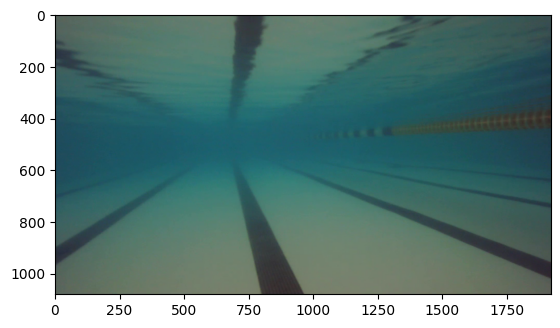

e =ValueError('min() arg is an empty sequence')


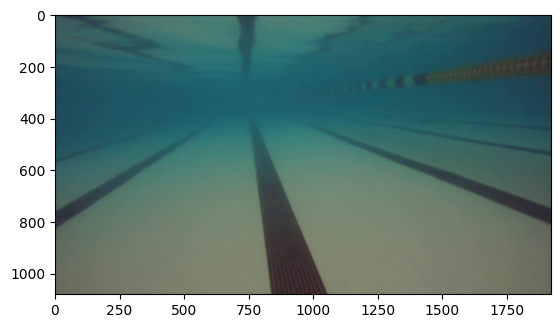

Center x_intercept: 843.5
turn left
The AUV should go to the forward


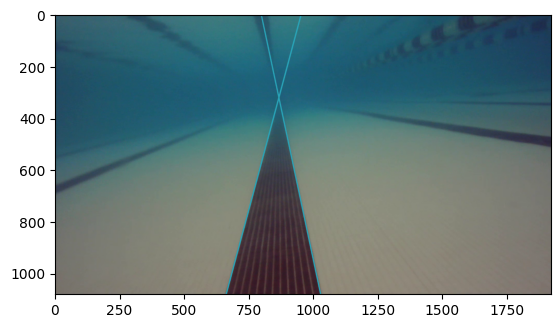

e =ValueError('min() arg is an empty sequence')


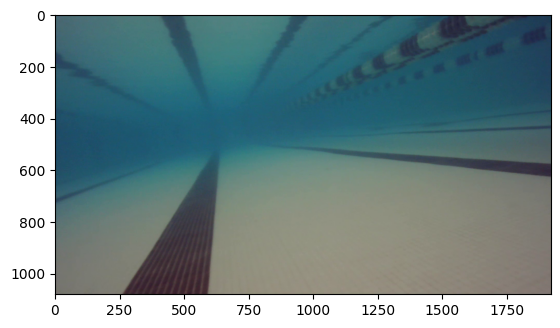

Center x_intercept: 852.0
turn right
The AUV should go to the forward


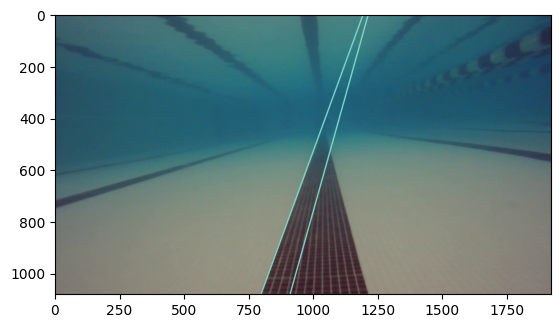

e =ValueError('min() arg is an empty sequence')


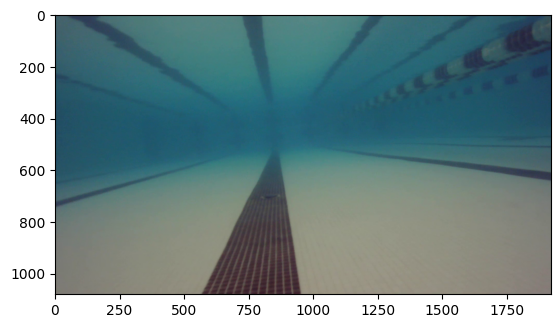

e =ValueError('min() arg is an empty sequence')


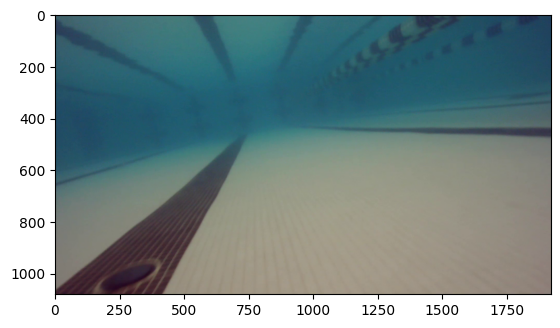

e =ValueError('min() arg is an empty sequence')


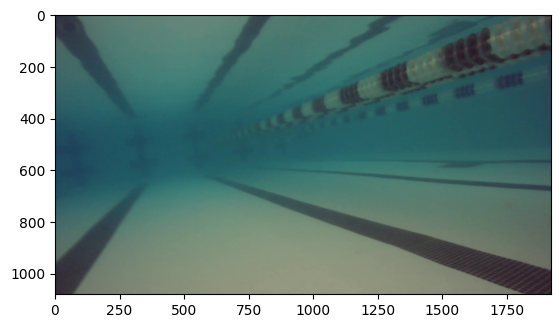

e =ValueError('min() arg is an empty sequence')


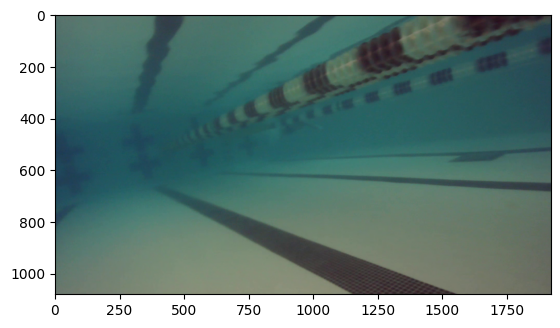

e =ValueError('min() arg is an empty sequence')


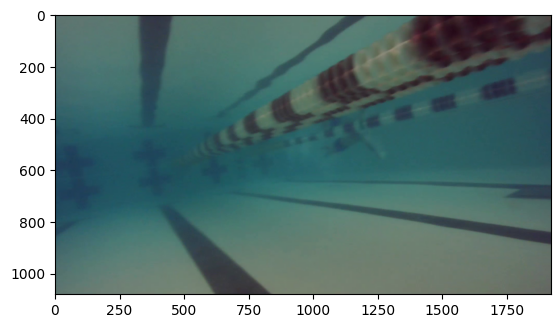

e =ValueError('min() arg is an empty sequence')


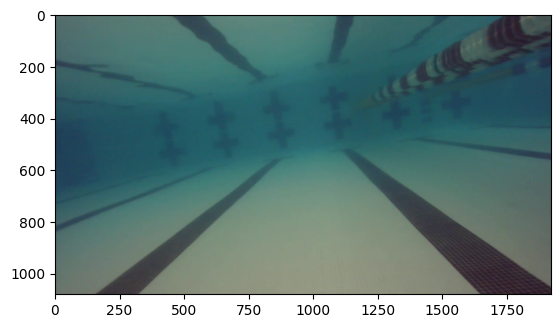

Center x_intercept: 627.0
turn right
The AUV should go to the left


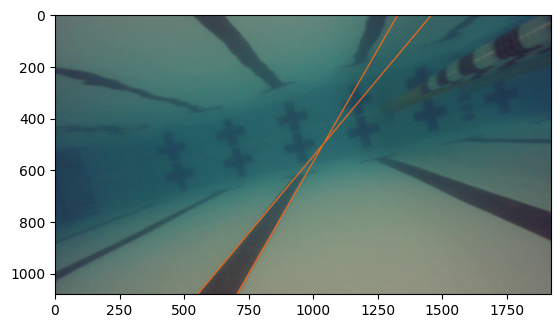

e =ValueError('min() arg is an empty sequence')


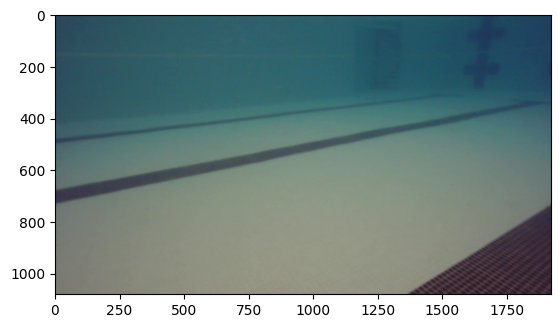

e =ValueError('min() arg is an empty sequence')


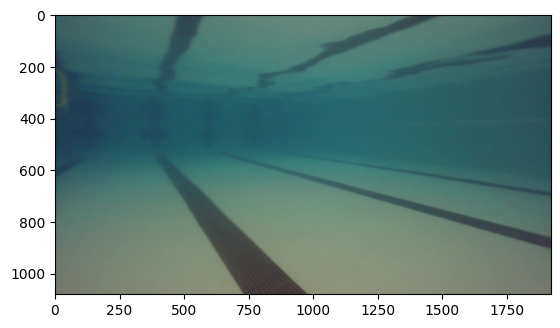

e =ValueError('min() arg is an empty sequence')


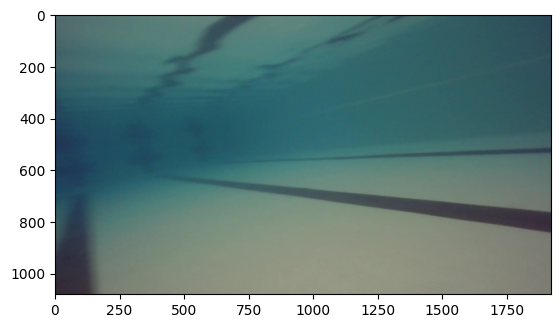

e =ValueError('min() arg is an empty sequence')


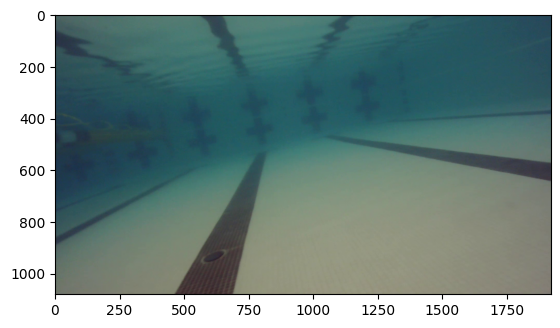

e =ValueError('min() arg is an empty sequence')


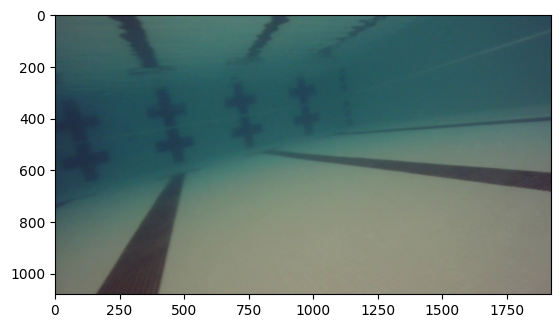

e =ValueError('min() arg is an empty sequence')


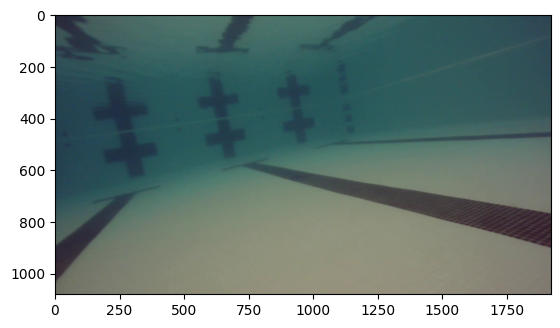

e =ValueError('min() arg is an empty sequence')


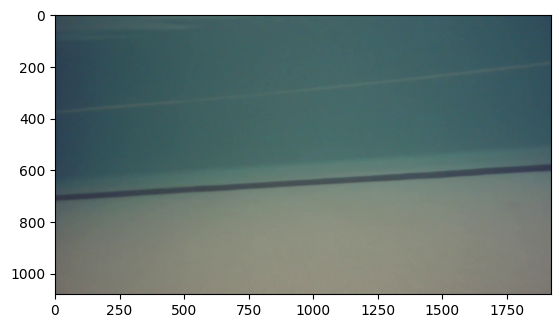

e =ValueError('min() arg is an empty sequence')


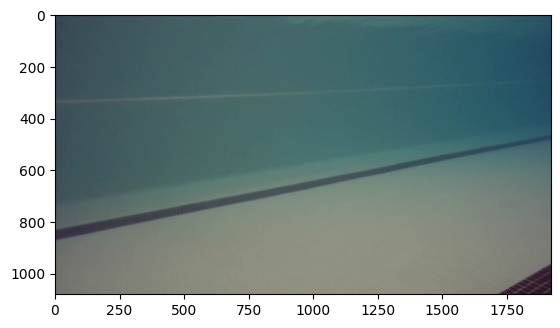

e =ValueError('min() arg is an empty sequence')


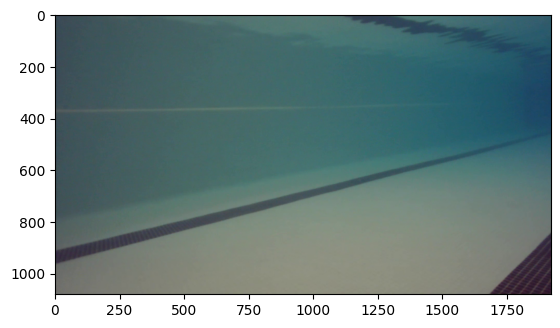

e =ValueError('min() arg is an empty sequence')


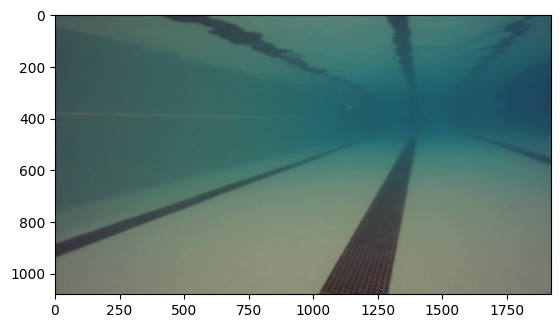

Center x_intercept: 1012.0
turn right
The AUV should go to the forward


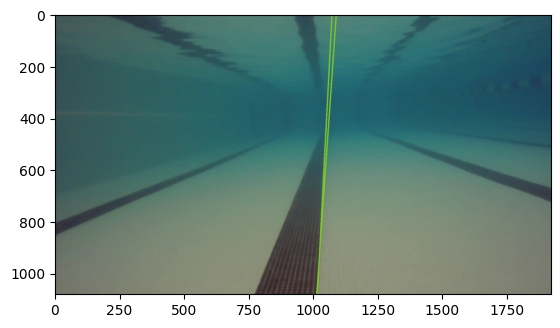

Center x_intercept: 688.5
turn right
The AUV should go to the left


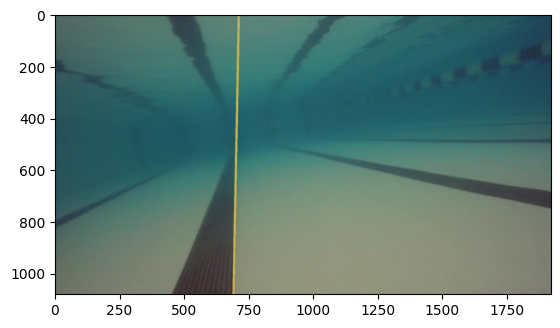

e =ValueError('min() arg is an empty sequence')


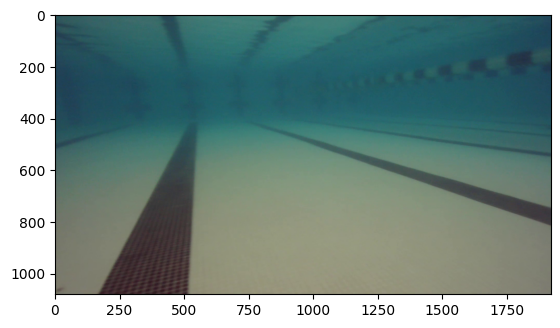

e =ValueError('min() arg is an empty sequence')


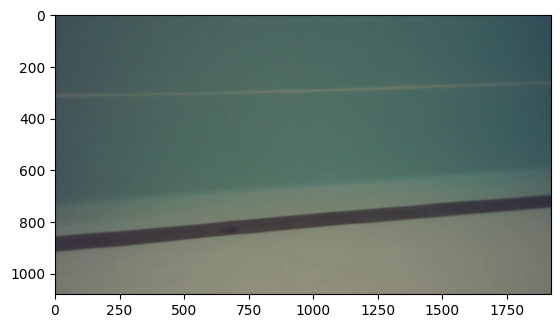

e =ValueError('min() arg is an empty sequence')


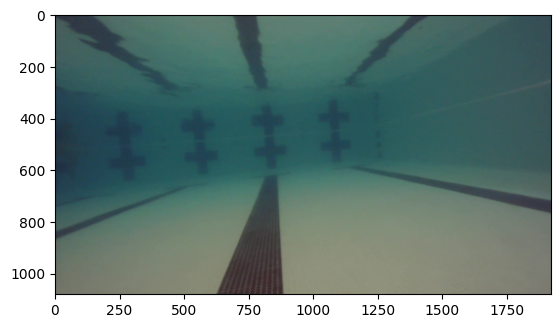

e =ValueError('min() arg is an empty sequence')


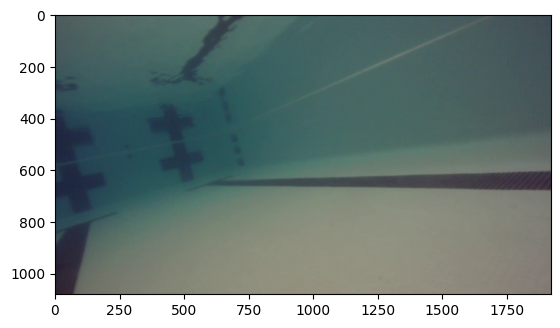

e =ValueError('min() arg is an empty sequence')


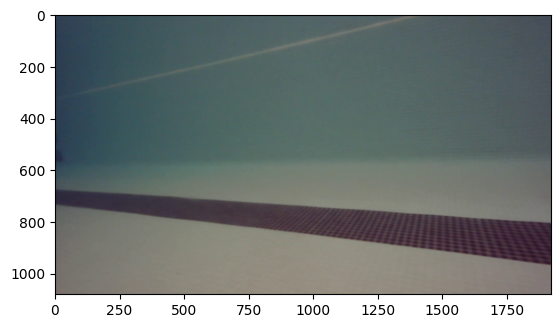

e =ValueError('min() arg is an empty sequence')


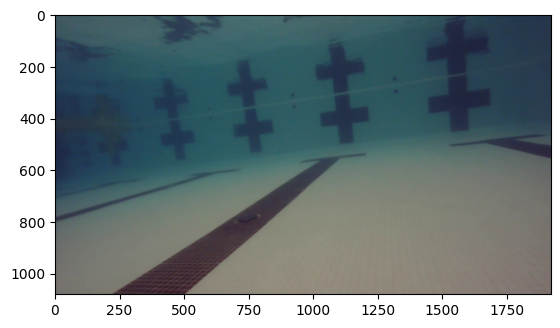

e =ValueError('min() arg is an empty sequence')


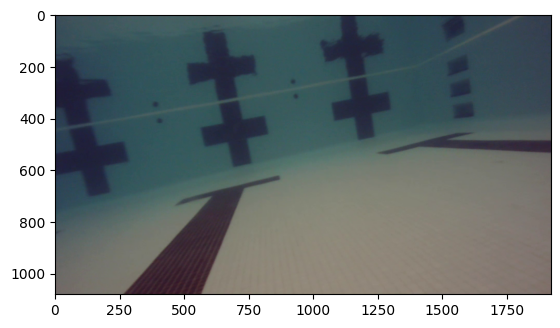

e =ValueError('min() arg is an empty sequence')


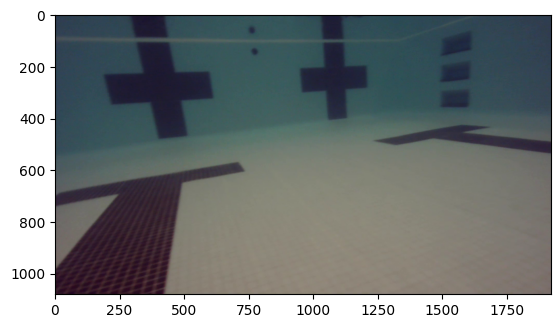

KeyboardInterrupt: 

In [9]:

cap = cv2.VideoCapture('AUV_Vid.mkv')

count = 0 # the number of frames since the last
frequency = 60 # the number of frames to skip

while cap.isOpened():
    ret, frame = cap.read()
    if count % frequency == 0:
        plt.imshow(cv2.cvtColor(render_frame(frame), cv2.COLOR_BGR2RGB))
        plt.show()
        
    count += 1

In [ ]:
def drawing(image, lines, color=(0, 255, 0)):
    for line in lines:
        x1, y1, x2, y2 = line.get_points()
        cv2.line(image,(x1,y1),(x2,y2),color,2)

    plt.imshow(image)
    plt.show()


t1 = 20
t2 = 25
min_length = 100
max_gap = 50
votes = 100
img = cv2.imread("rov_pool.jpg")
blurred_img = cv2.GaussianBlur(img, (13, 13), 100)
edges = cv2.Canny(blurred_img, t1, t2, apertureSize=3)  # detect edges
# drawing(img.copy(), lines)

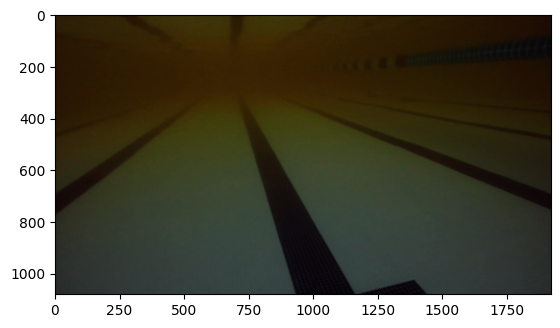

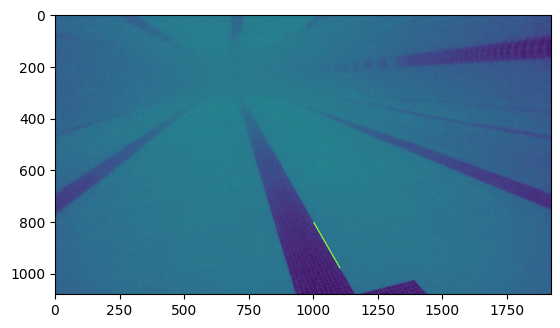

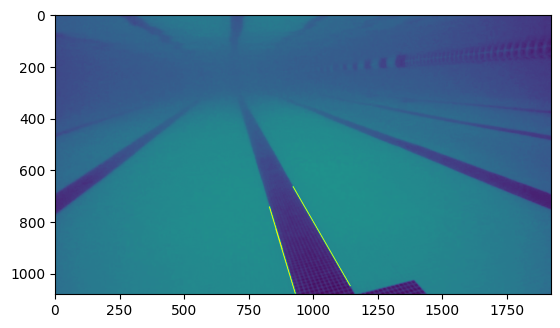

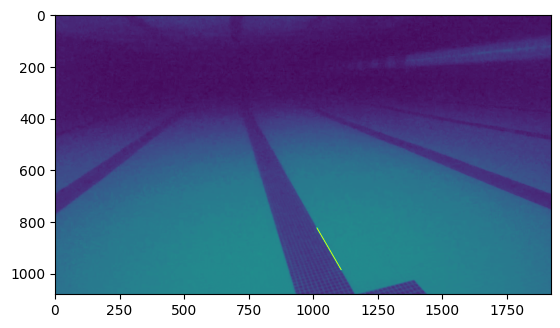

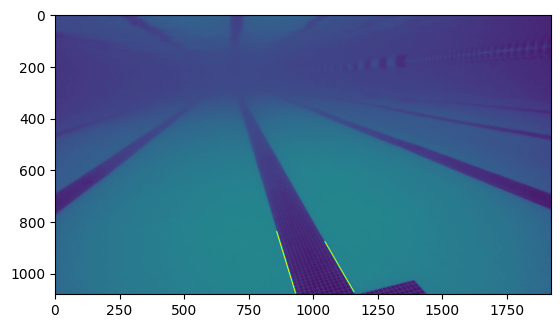

In [7]:
# img = cv2.imread("lanes.png")
img = cv2.imread("rov_pool.jpg")
# width = img.shape[1]

gamma = 2
lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
res = cv2.LUT(img, lookUpTable)
plt.imshow(res)
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
b,g,r = cv2.split(img)

lines = lane_detection.detect_lines(b, 50, 50, 3, 150, 10)
b = lane_detection.draw_lines(b, lines, (255, 0, 0))
plt.imshow(b)
plt.show()

lines = lane_detection.detect_lines(g, 50, 50, 3, 150, 10)
g = lane_detection.draw_lines(g, lines, (255, 0, 0))
plt.imshow(g)
plt.show()

lines = lane_detection.detect_lines(r, 50, 50, 3, 150, 10)
r = lane_detection.draw_lines(r, lines, (255, 0, 0))
plt.imshow(r)
plt.show()

lines = lane_detection.detect_lines(gray, 50, 50, 3, 150, 10)
gray = lane_detection.draw_lines(gray, lines, (255, 0, 0))
plt.imshow(gray)
plt.show()

Original


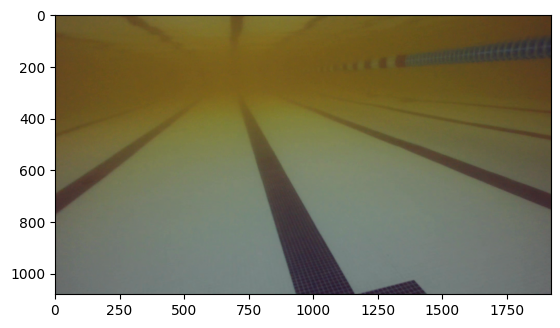

TypeError: 'NoneType' object is not iterable

In [6]:
img = cv2.imread("rov_pool.jpg")
# _,img,_ = cv2.split(cv2.imread("rov_pool.jpg"))
# copy = img
# lines = lane_detection.detect_lines(copy, 50, 50, 3, 150, 10)
# lined_img = lane_detection.draw_lines(copy, lines, (255, 0, 0))
print("Original")
plt.imshow(img)
plt.show()
gamma = 1.00
for i in range(4):
    lookUpTable = np.empty((1,256), np.uint8)
    for i in range(256):
        lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    # for lower_threshold in range(30, 35, 1):
    #     for upper_threshold in range(100, 110, 2):
    lower_threshold = 35
    upper_threshold = 110
    res = cv2.LUT(img, lookUpTable)
    lines = lane_detection.detect_lines(res, lower_threshold, upper_threshold, 3, 100, 30)
    res = lane_detection.draw_lines(res, lines, (255, 0, 0))
    print(f"{gamma =}, {lower_threshold = }, {upper_threshold = }")
    plt.imshow(res)
    plt.show()
    gamma += 0.25

In [ ]:
img = cv2.imread("rov_pool.jpg")
# _,img,_ = cv2.split(cv2.imread("rov_pool.jpg"))
blurred_img = cv2.GaussianBlur(img, (13, 13), 100)
t1 = 20
t2 = 25
min_length = 100
max_gap = 50
votes = 100

print(f"Edges with {t1 = } and {t2 = }")
edges = cv2.Canny(blurred_img, t1, t2, apertureSize=3)  # detect edges
plt.imshow(edges)
plt.show()

def drawing(image, lines):
    cleans = np.empty(shape=[0,4], dtype=np.int32)
    for line in lines:
            line_angle = np.degrees(np.arctan2(line[0][2]-line[0][0], line[0][3]-line[0][1]))

            if len(cleans) == 0:
                cleans = np.append(cleans, [line[0]], axis=0)
                continue

            similar = False
            for c in cleans:
                existing_angle = np.degrees(np.arctan2(c[2]-c[0], c[3]-c[1]))
                if abs(line_angle-existing_angle) <= 3.5:
                    similar = True
                    break

            if not similar:
                cleans = np.append(cleans, [line[0]], axis=0)

    for line in [cleans]:
        for x1,y1,x2,y2 in line:
            cv2.line(image,(x1,y1),(x2,y2),255,2)

    plt.imshow(image)
    plt.show()


# t1 = 20
# t2 = 25
# min_length = 100
# max_gap = 50
# votes = 100
for t1 in range(15, 26, 5):
    for t2 in range(15, 26, 5):
        for min_length in range(100, 300, 75):
            for max_gap in range(10, 50, 10):
                edges = cv2.Canny(blurred_img, t1, t2, apertureSize=3)  # detect edges
                lines = cv2.HoughLinesP(edges, 1, np.pi / 180, votes, minLineLength=50, maxLineGap=10)
                drawing(img.copy(), lines)